# Indlæs data

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv("total_raw_wikidata.csv")
df.head()

,text,label_num,label,title_list
0,"Uddannelse er et udtryk, der både benyttes om ...",0,Uddannelse,Uddannelse
1,30 er en dansk dokumentarfilm fra 2013 instrue...,0,Uddannelse,30 (dokumentarfilm)
2,"Accessit fra latin for han er kommet nær til, ...",0,Uddannelse,Accessit
3,"Almen dannelse er et begreb, der bruges om en ...",0,Uddannelse,Almendannelse
4,"En alumnus eller alumne er altid en person, me...",0,Uddannelse,Alumne


In [30]:
df.shape

(13926, 4)

# Konvert data til nyt format

In [31]:
label_names = list(df.label.unique())
label_names

['Uddannelse',
 'Samfund',
 'Videnskab',
 'Natur',
 'Teknologi',
 'Kultur',
 'Historie',
 'Sundhed',
 'Geografi',
 'Økonomi',
 'Sport',
 'Religion',
 'Politik',
 'Erhvervsliv']

In [32]:
id2label = {ix:label for ix, label in enumerate(df.label.unique())}
label2id = {v:k for k, v  in id2label.items()}

In [33]:
dff = pd.get_dummies(df, columns=["label_num"])
dff.drop("label", axis=1, inplace=True)
dff.columns = ["Tekst", "Titel"] + label_names
dff

,Tekst,Titel,Uddannelse,Samfund,Videnskab,Natur,Teknologi,Kultur,Historie,Sundhed,Geografi,Økonomi,Sport,Religion,Politik,Erhvervsliv
0,"Uddannelse er et udtryk, der både benyttes om ...",Uddannelse,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30 er en dansk dokumentarfilm fra 2013 instrue...,30 (dokumentarfilm),1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Accessit fra latin for han er kommet nær til, ...",Accessit,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Almen dannelse er et begreb, der bruges om en ...",Almendannelse,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"En alumnus eller alumne er altid en person, me...",Alumne,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13921,"En selvejende institution er et foretagende, d...",Selvejende institution,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13922,"En skibsreder er en person, der ejer et eller ...",Skibsreder,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13923,"En social virksomhed er en virksomhed, der er ...",Social virksomhed,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13924,En socialøkonomisk virksomhed er en virksomhed...,Socialøkonomisk virksomhed,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Nogle artikeltekster er gengangere. Derfor bør grupperer vi efter teksterne og summerer deres kategorioptællinger

In [34]:
data = dff.groupby(["Tekst", "Titel"]).sum()
data = data.mask(data>1, 1).reset_index() # sørger for at en tekst kun kan have 0 eller 1 for en kategori - en tekst skal ikke have en værdi af 3 for fx kategorien "Sundhed" bare fordi den er scrapet 3 gange
data

,Tekst,Titel,Uddannelse,Samfund,Videnskab,Natur,Teknologi,Kultur,Historie,Sundhed,Geografi,Økonomi,Sport,Religion,Politik,Erhvervsliv
0,"#Please dont steal my work, er en dansk kampag...",Please don't steal my work,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,"-dømme, som benyttet i forbindelser som kejser...",-dømme,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,. Kontraspionage er en efterretningsdisciplin ...,Kontraspionage,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1 faset induktionsmotor med driftkondensator. ...,1-faset asynkron motor,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,"1,000 Guineas Stakes er et hestevæddeløb i Sto...","1,000 Guineas Stakes",0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10519,Øvelsen Operation Mjølner er en kompleks AWWLF...,Operation Mjølner,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10520,"Øvrighed, også kaldet verdslig øvrighed, beteg...",Øvrighed,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10521,Øystein Bråten er norsk freestyle skiløber. Br...,Øystein Bråten,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10522,šAutomatisk vagtplanlægning er et kombinatoris...,Automatisk vagtplanlægning,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
# Check antal multilabel observationer
data[data.iloc[:,1:].sum(axis=1) > 1]

C:\Users\johse\AppData\Local\Temp\ipykernel_8808\3831922275.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data.iloc[:,1:].sum(axis=1) > 1]


,Tekst,Titel,Uddannelse,Samfund,Videnskab,Natur,Teknologi,Kultur,Historie,Sundhed,Geografi,Økonomi,Sport,Religion,Politik,Erhvervsliv
2,. Kontraspionage er en efterretningsdisciplin ...,Kontraspionage,0,1,0,0,0,0,0,0,0,0,0,0,1,0
38,"68ere, 68erne eller 68-generationen er dem der...",68'erne,0,1,0,0,0,1,0,0,0,0,0,0,0,0
41,"7-trins-skalaen, 12-skalaen eller bare den nye...",7-trins-skalaen,1,0,1,0,0,0,0,0,0,0,0,0,0,0
43,8-timers arbejdsdag var en social bevægelse fo...,8-timers arbejdsdag,0,1,0,0,0,0,0,0,0,1,0,0,0,1
52,A.M. Turing-prisen er en pris som gives én gan...,Turing-prisen,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,"Økonomisk historie er en del af historiefaget,...",Økonomisk historie,0,1,1,0,0,0,1,0,0,1,0,0,0,0
10499,"Økonomisk kriminalitet er profitmotiverede, lo...",Økonomisk kriminalitet,0,1,0,0,0,0,0,0,0,1,0,0,0,0
10503,Økonomistyring er et fag-begreb der bliver bru...,Økonomistyring,0,0,1,0,0,0,0,0,0,1,0,0,0,1
10504,"Økonomisystemer referer oftest til software, d...",Økonomisystem,0,0,0,0,0,0,0,0,0,1,0,0,0,1


Så omtrent 17% (180 / 10524) er multilabel

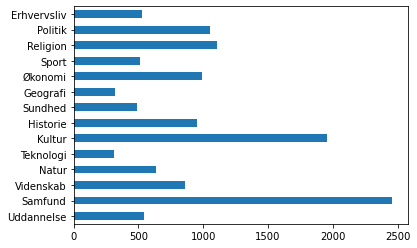

In [36]:
data.iloc[:,2:].sum().plot.barh();

In [37]:
data.head()

,Tekst,Titel,Uddannelse,Samfund,Videnskab,Natur,Teknologi,Kultur,Historie,Sundhed,Geografi,Økonomi,Sport,Religion,Politik,Erhvervsliv
0,"#Please dont steal my work, er en dansk kampag...",Please don't steal my work,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,"-dømme, som benyttet i forbindelser som kejser...",-dømme,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,. Kontraspionage er en efterretningsdisciplin ...,Kontraspionage,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1 faset induktionsmotor med driftkondensator. ...,1-faset asynkron motor,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,"1,000 Guineas Stakes er et hestevæddeløb i Sto...","1,000 Guineas Stakes",0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [48]:
indices_list = []
for ix, rows in data.iterrows():
    bool_list = rows[2:] == 1
    indices = [int(ix) for ix, x in enumerate(bool_list) if x]
    indices_list.append(indices)

In [62]:
data["Label"] = indices_list

In [65]:
import ast

In [67]:
def toList(x):
    try: 
        return ast.literal_eval(x) 
    except: 
        return x
data.Label.apply(lambda x:  toList(x))

0            [2]
1            [5]
2        [1, 12]
3            [4]
4           [10]
          ...   
10519        [1]
10520        [1]
10521       [10]
10522       [13]
10523       [11]
Name: Label, Length: 10524, dtype: object

In [68]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.1)
train, val = train_test_split(train, random_state=42, test_size=0.1)

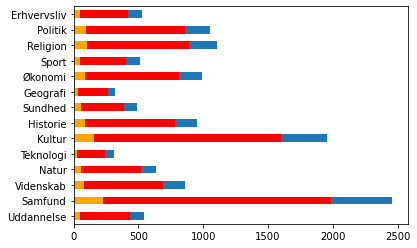

In [69]:
data.iloc[:,2:-1].sum().plot.barh();
train.iloc[:,2:-1].sum().plot.barh(color="red");
val.iloc[:,2:-1].sum().plot.barh(color="orange");

# Gem data

In [70]:
data.to_csv("total_wikidata_processed.csv", index=False)

In [71]:
train.to_csv("train.csv", index=False)
val.to_csv("val.csv", index=False)
test.to_csv("test.csv", index=False)

In [73]:
type(train.Label[0])

list